In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir

exp_path = '../experiments'

low_psi_path = exp_path + '/20240603-094003-RDK_n10_psi_0.01'
low_psi = float(low_psi_path.split('_')[-1])

high_psi_path = exp_path + '/20240604-092023-RDK_n10_psi_0.75'  
high_psi = float(high_psi_path.split('_')[-1])

# Runtime analysis

In [3]:
runtimes_low_psi = pd.read_csv(low_psi_path + '/epoch_runtimes.csv')
runtimes_low_psi['Psi'] = low_psi
runtimes_low_psi['cumtime'] = runtimes_low_psi['runtime'].cumsum()

runtimes_high_psi = pd.read_csv(high_psi_path + '/epoch_runtimes.csv')
runtimes_high_psi['Psi'] = high_psi
runtimes_high_psi['cumtime'] = runtimes_high_psi['runtime'].cumsum()

runtimes = pd.concat([runtimes_low_psi, runtimes_high_psi])
runtimes

,epoch,runtime,Psi,cumtime
0,1,119.509742,0.01,119.509742
1,2,120.806703,0.01,240.316444
2,3,121.803323,0.01,362.119767
3,4,120.908504,0.01,483.028271
4,5,120.337275,0.01,603.365547
...,...,...,...,...
40,41,1018.834491,0.75,41872.830515
41,42,1012.971873,0.75,42885.802388
42,43,1023.519611,0.75,43909.321999
43,44,1016.527066,0.75,44925.849066


In [44]:
runtimes.query('Psi != 0.01')

,epoch,runtime,Psi,cumtime
0,1,1039.321305,0.75,1039.321305
1,2,1018.640560,0.75,2057.961865
2,3,1038.936271,0.75,3096.898136
3,4,1036.125191,0.75,4133.023327
4,5,1014.048902,0.75,5147.072229
5,6,1014.389917,0.75,6161.462146
6,7,1022.461013,0.75,7183.923159
7,8,1021.758474,0.75,8205.681634
8,9,1012.098385,0.75,9217.780019
9,10,1012.813604,0.75,10230.593623


In [20]:
max(runtimes.cumtime)

45949.76252913475

In [18]:
low_finish = max(runtimes.query('Psi == 0.01').cumtime)
runtimes.query(f'cumtime > {low_finish}')

,epoch,runtime,Psi,cumtime
5,6,1014.389917,0.75,6161.462146
6,7,1022.461013,0.75,7183.923159
7,8,1021.758474,0.75,8205.681634
8,9,1012.098385,0.75,9217.780019
9,10,1012.813604,0.75,10230.593623
10,11,1019.859515,0.75,11250.453137
11,12,1015.082052,0.75,12265.535189
12,13,1023.740222,0.75,13289.275411
13,14,1013.780033,0.75,14303.055444
14,15,1035.212735,0.75,15338.268178


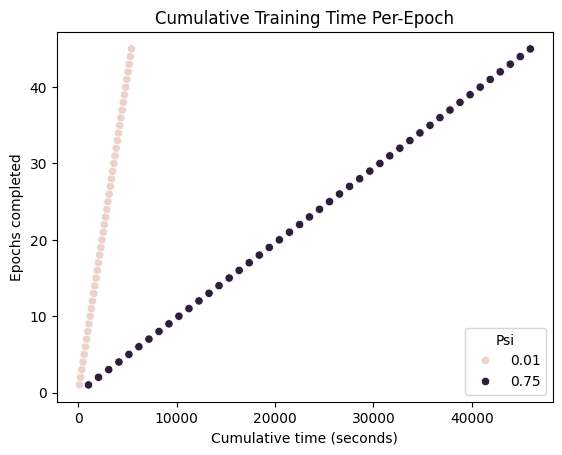

In [14]:
sns.scatterplot(runtimes, x='cumtime', y='epoch', hue='Psi')
plt.xlabel('Cumulative time (seconds)')
plt.ylabel('Epochs completed')
plt.title('Cumulative Training Time Per-Epoch')
plt.savefig('cumulative_train_time.png')

# PPSE Performance per epoch

In [5]:
polySE_low_psi = []
for loc in listdir(low_psi_path):
    if loc.startswith('checkpoint'):
        epoch = int(loc.split('_')[-1]) + 1
        res = pd.read_csv(f'{low_psi_path}/{loc}/polySE_results_aggregations.csv')
        res['epoch'] = epoch
        res['Psi'] = low_psi
        polySE_low_psi.append(res)
polySE_low_psi = pd.concat(polySE_low_psi)

polySE_high_psi = []
for loc in listdir(high_psi_path):
    if loc.startswith('checkpoint'):
        epoch = int(loc.split('_')[-1]) + 1
        res = pd.read_csv(f'{high_psi_path}/{loc}/polySE_results_aggregations.csv')
        res['epoch'] = epoch
        res['Psi'] = high_psi
        polySE_high_psi.append(res)
polySE_high_psi = pd.concat(polySE_high_psi)
polySE = pd.concat([polySE_high_psi, polySE_low_psi])

groupby_cols = ['epoch', 'Psi']

warm_start = polySE.query('fake_triple_component != "both"')
warm_medians = []
for tup, subdf in warm_start.groupby(groupby_cols):
    warm_medians.append(list(tup) + [subdf.AUPRC.median()])
warm_medians = pd.DataFrame(warm_medians, columns=groupby_cols + ['median_AUPRC']).sort_values('epoch')
warm_medians['rolling_max'] = None
for psi in warm_medians.Psi.unique():
    cummax = warm_medians.query(f'Psi == {psi}').median_AUPRC.cummax()
    warm_medians['rolling_max'].loc[cummax.index] = cummax.values

cold_start = polySE.query('fake_triple_component == "both"')
cold_medians = []
for tup, subdf in cold_start.groupby(groupby_cols):
    cold_medians.append(list(tup) + [subdf.AUPRC.median()])
cold_medians = pd.DataFrame(cold_medians, columns=groupby_cols + ['median_AUPRC']).sort_values('epoch')
cold_medians['rolling_max'] = None
for psi in cold_medians.Psi.unique():
    cummax = cold_medians.query(f'Psi == {psi}').median_AUPRC.cummax()
    cold_medians['rolling_max'].loc[cummax.index] = cummax.values

/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_43010/56395436.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_medians['rolling_max'].loc[cummax.index] = cummax.values
/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_43010/56395436.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_medians['rolling_max'].loc[cummax.index] = cummax.values
/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_43010/56395436.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

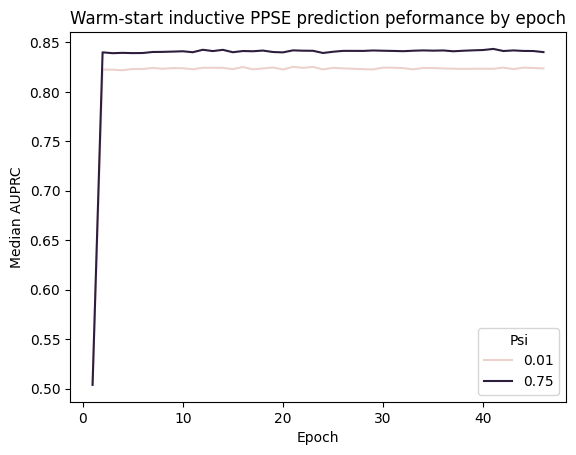

In [6]:
sns.lineplot(warm_medians, x='epoch', y='median_AUPRC', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Median AUPRC')
plt.title('Warm-start inductive PPSE prediction peformance by epoch')
plt.savefig('AUPRC_by_epoch_warm_start.png')

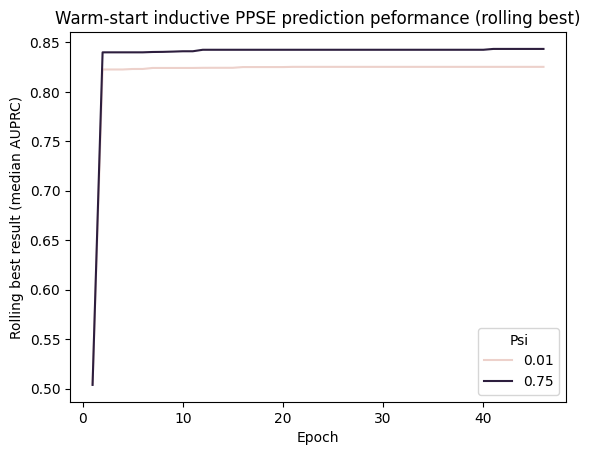

In [12]:
sns.lineplot(warm_medians, x='epoch', y='rolling_max', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Rolling best result (median AUPRC)')
plt.title('Warm-start inductive PPSE prediction peformance (rolling best)')
plt.savefig('AUPRC_rolling_max_warm_start.png')

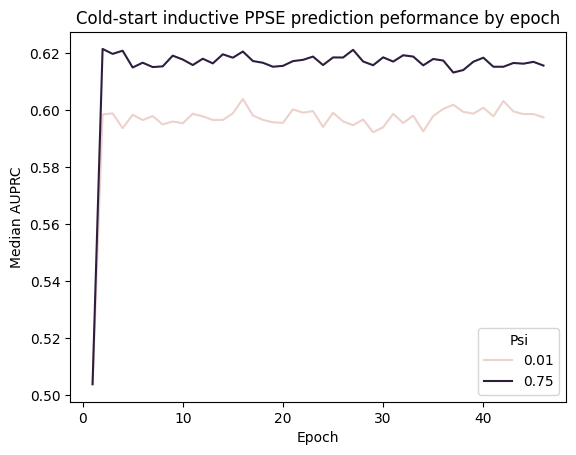

In [8]:
sns.lineplot(cold_medians, x='epoch', y='median_AUPRC', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Median AUPRC')
plt.title('Cold-start inductive PPSE prediction peformance by epoch')
plt.savefig('AUPRC_by_epoch_cold_start.png')

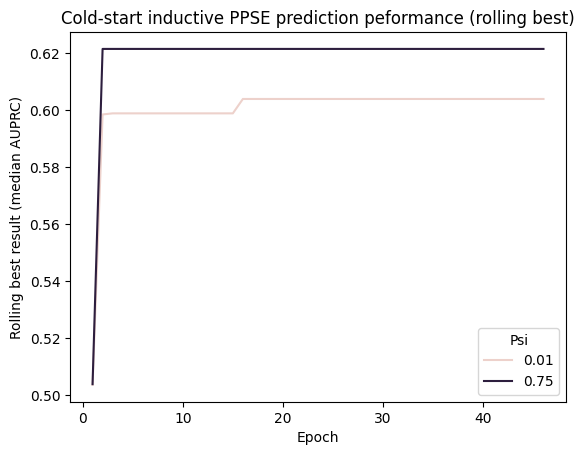

In [13]:
sns.lineplot(cold_medians, x='epoch', y='rolling_max', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Rolling best result (median AUPRC)')
plt.title('Cold-start inductive PPSE prediction peformance (rolling best)')
plt.savefig('AUPRC_rolling_max_cold_start.png')

In [33]:
x = warm_medians.query('Psi == 0.01').rolling_max.reset_index(drop=True)
y = warm_medians.query('Psi == 0.75').rolling_max.reset_index(drop=True)
y - x

0    -0.001124
1     0.017333
2     0.017333
3     0.017333
4     0.016834
5     0.016811
6     0.016138
7     0.016258
8     0.016531
9     0.016871
10    0.016871
11    0.018251
12    0.018213
13    0.018213
14    0.018213
15    0.017483
16    0.017483
17    0.017483
18    0.017483
19    0.017483
20    0.017275
21    0.017275
22    0.017275
23    0.017275
24    0.017275
25    0.017275
26    0.017275
27    0.017275
28    0.017275
29    0.017275
30    0.017275
31    0.017275
32    0.017275
33    0.017275
34    0.017275
35    0.017275
36    0.017275
37    0.017275
38    0.017275
39    0.017275
40    0.018132
41    0.018132
42    0.018132
43    0.018132
44    0.018132
45    0.018132
Name: rolling_max, dtype: object

In [32]:
x = cold_medians.query('Psi == 0.01').rolling_max.reset_index(drop=True)
y = cold_medians.query('Psi == 0.75').rolling_max.reset_index(drop=True)
y - x

0     0.000276
1     0.023015
2      0.02263
3      0.02263
4      0.02263
5      0.02263
6      0.02263
7      0.02263
8      0.02263
9      0.02263
10     0.02263
11     0.02263
12     0.02263
13     0.02263
14     0.02263
15    0.017575
16    0.017575
17    0.017575
18    0.017575
19    0.017575
20    0.017575
21    0.017575
22    0.017575
23    0.017575
24    0.017575
25    0.017575
26    0.017575
27    0.017575
28    0.017575
29    0.017575
30    0.017575
31    0.017575
32    0.017575
33    0.017575
34    0.017575
35    0.017575
36    0.017575
37    0.017575
38    0.017575
39    0.017575
40    0.017575
41    0.017575
42    0.017575
43    0.017575
44    0.017575
45    0.017575
Name: rolling_max, dtype: object

In [35]:
warm_medians

,epoch,Psi,median_AUPRC,rolling_max
0,1,0.01,0.504856,0.504856
1,1,0.75,0.503732,0.503732
2,2,0.01,0.822601,0.822601
3,2,0.75,0.839934,0.839934
4,3,0.01,0.822348,0.822601
...,...,...,...,...
87,44,0.75,0.841361,0.843385
88,45,0.01,0.824157,0.825253
89,45,0.75,0.841256,0.843385
90,46,0.01,0.823688,0.825253


In [37]:
# Warm low psi
0.822601/0.825253

0.9967864400371765

In [38]:
# Warm high psi
0.839934/0.843385


0.9959081558244455

In [42]:
cold_medians.query('Psi != 0.01')

,epoch,Psi,median_AUPRC,rolling_max
1,1,0.75,0.503815,0.503815
3,2,0.75,0.621540,0.62154
5,3,0.75,0.619796,0.62154
7,4,0.75,0.620904,0.62154
9,5,0.75,0.615020,0.62154
11,6,0.75,0.616700,0.62154
13,7,0.75,0.615168,0.62154
15,8,0.75,0.615417,0.62154
17,9,0.75,0.619175,0.62154
19,10,0.75,0.617815,0.62154


In [40]:
# Cold low psi
0.598524/0.603964

0.9909928406328854

In [43]:
# Cold high psi
0.62154/0.62154

1.0

In [59]:
data = []
for tup, subdf in warm_start.groupby(['Psi', 'epoch']):
    data.append(list(tup) + [subdf.AUROC.median()])

pd.DataFrame(data, columns=['psi', 'epoch', 'median_AUROC']).sort_values('median_AUROC', ascending=False)

,psi,epoch,median_AUROC
86,0.75,41,0.872620
74,0.75,29,0.872439
57,0.75,12,0.872340
80,0.75,35,0.872006
63,0.75,18,0.871938
...,...,...,...
39,0.01,40,0.850231
14,0.01,15,0.850209
38,0.01,39,0.849875
0,0.01,1,0.500684


In [60]:
data = []
for tup, subdf in cold_start.groupby(['Psi', 'epoch']):
    data.append(list(tup) + [subdf.AUROC.median()])

pd.DataFrame(data, columns=['psi', 'epoch', 'median_AUROC']).sort_values('median_AUROC', ascending=False)

,psi,epoch,median_AUROC
47,0.75,2,0.638177
49,0.75,4,0.637144
54,0.75,9,0.635781
59,0.75,14,0.635647
48,0.75,3,0.635447
...,...,...,...
28,0.01,29,0.603994
3,0.01,4,0.603306
33,0.01,34,0.603049
0,0.01,1,0.499645
